In [27]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
clean_df = pd.read_csv('cleaner_doordash_data.csv')
clean_df

,Unnamed: 0,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,latitude,longitude,...,loc_name,loc_number,url,address,cuisines,delivery_time_raw,delivery_time,review_count,review_rating,cuisines split
0,2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.675464,-73.980782,...,Lotus Vietnamese Sandwiches,7552,https://www.doordash.com/store/7552/?pickup=false,"229 5th Avenue, Brooklyn, NY 11215, USA",Vietnamese|Bubble Tea|Smoothies|Sandwiches|Pho,24 - 34,29,1364,4.8,"['Vietnamese', 'Bubble Tea', 'Smoothies', 'San..."
1,5,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,40.672978,-73.950462,...,Taqueria Milear,133345,https://www.doordash.com/store/133345/?pickup=...,"752 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Tacos|Burritos|Dessert|Brunch,23 - 33,28,2000,4.6,"['Mexican', 'Tacos', 'Burritos', 'Dessert', 'B..."
2,8,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.674537,-73.950007,...,Cielito Lindo,328460,https://www.doordash.com/store/328460/?pickup=...,"665 Nostrand Ave, Brooklyn, NY 11216, USA",Mexican|Breakfast|Burritos|Salads|Soup,20 - 30,25,163,4.7,"['Mexican', 'Breakfast', 'Burritos', 'Salads',..."
3,11,11219,40.631075,-73.997695,"4701 15th Ave, Brooklyn, NY 11219, USA",NY,Brooklyn,NY,40.680930,-73.977140,...,Artichoke Basille's Pizza,48755,https://www.doordash.com/store/48755/?pickup=f...,"59 5th Ave, Brooklyn, NY 11217, USA",Pizza|Pie,37 - 47,42,2000,4.5,"['Pizza', 'Pie']"
4,14,10003,40.732473,-73.987380,"41 Cooper Square, 7 E 7th St, New York, NY 100...",NY,New York,NY,40.668583,-73.980515,...,Five Guys Burgers & Fries,5155,https://www.doordash.com/store/5155/?pickup=false,"284 7th Avenue, Brooklyn, NY 11215, USA",Hot Dogs|Dinner|Fast Food|Burgers,29 - 39,34,2000,4.5,"['Hot Dogs', 'Dinner', 'Fast Food', 'Burgers']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,11214,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.463513,-71.026401,...,Buffalo Wild Wings,882147,https://www.doordash.com/store/882147/?pickup=...,"Buffalo Wild Wings, 180 Main St, Saugus, MA 01...",Dinner|Takeout|Pickup|Lunch|Burgers|Chicken Wi...,35 - 45,40,955,4.0,"['Dinner', 'Takeout', 'Pickup', 'Lunch', 'Burg..."
4069,11215,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.478599,-71.063536,...,Dockside Restaurant,267895,https://www.doordash.com/store/267895/?pickup=...,"Dockside Restaurants, 1099 Main St, Wakefield,...",American|Sandwiches|Burgers|Pizza,46 - 56,51,82,4.1,"['American', 'Sandwiches', 'Burgers', 'Pizza']"
4070,11216,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.460613,-71.027119,...,Pretzelmaker,1256176,https://www.doordash.com/store/1256176/?pickup...,"1201 Broadway, Saugus, MA 01906, USA",Beverages|Pretzels|Smoothies,27 - 37,32,110,4.5,"['Beverages', 'Pretzels', 'Smoothies']"
4071,11217,2176,42.457335,-71.061662,"119 Myrtle St, Melrose, MA 02176, USA",MA,Melrose,BO,42.463535,-71.026164,...,Wild Burger,2360386,https://www.doordash.com/store/2360386/?pickup...,"180 Main St, Saugus, MA 01906, USA",American|Burgers|Sandwiches,29 - 39,34,23,3.7,"['American', 'Burgers', 'Sandwiches']"


In [43]:
delivery_time = clean_df["delivery_time"]
rating = clean_df["review_rating"]
correlation_result = st.linregress(rating, delivery_time)
regress_values = rating * correlation_result.slope + correlation_result.intercept
line_eq = "y = " + str(round(correlation_result.slope,2)) + "x + " + str(round(correlation_result.intercept,2))
print(correlation_result)

LinregressResult(slope=-21.741901478332277, intercept=139.54244253607374, rvalue=-0.10119196606191999, pvalue=9.62574155732796e-11, stderr=3.3501629262746655, intercept_stderr=14.181932271493086)


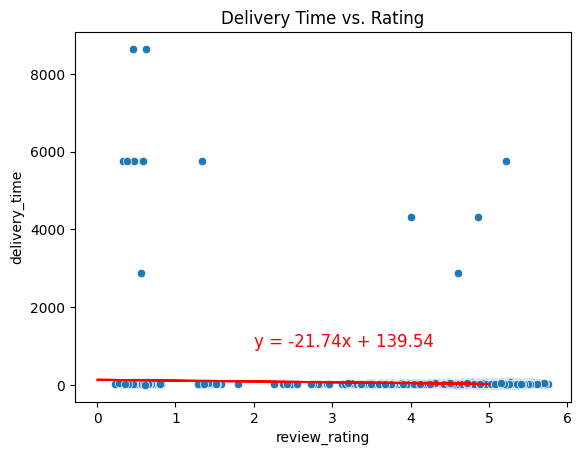

In [55]:
def jitter(values,n):
    return values + np.random.normal(n,0.1,values.shape)

sns.scatterplot(x=jitter(rating, 0.5), y=jitter(delivery_time, 0.5))
plt.plot(rating,regress_values,"r-")
plt.annotate(line_eq,(2,1000),fontsize=12,color="red")
plt.title("Delivery Time vs. Rating")
plt.savefig("scatterplot_output.jpg")